In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in the pandas dataFrame
ride_data_df  = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178
4,South Jack,3/6/2019 4:28,34.58,3908451377344
5,South Latoya,3/11/2019 12:26,9.52,1994999424437
6,New Paulville,2/27/2019 11:17,43.25,793208410091
7,Simpsonburgh,4/26/2019 0:43,35.98,111953927754
8,South Karenland,1/8/2019 3:28,35.09,7995623208694
9,North Jasmine,3/9/2019 6:26,42.81,5327642267789


In [6]:
# Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique calies of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [11]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [17]:
# Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [18]:
# Create the Suburban and Rural city DataFrames
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1076079536213,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1985256326182,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4018025271936,2,Rural


In [19]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [21]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [22]:
# Get the average fares for each city in the suburban and rural areas
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [23]:
# Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [24]:
# Get the average number of drivers for the suburban and rural areas
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

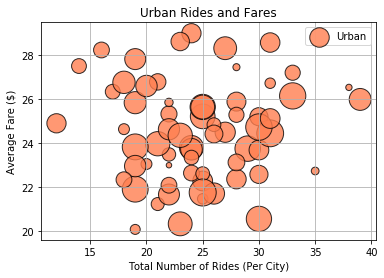

In [25]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, label="Urban", color= "coral", s=10*urban_driver_count, 
            edgecolor="black", linewidths=1, alpha=.8)
plt.title('Urban Rides and Fares')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.legend()
plt.grid()


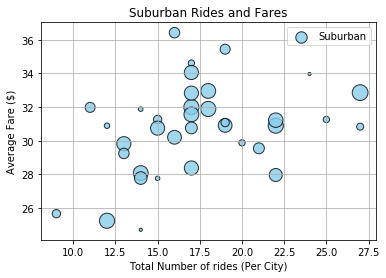

In [26]:
# Build the scatter plots for suburban cities 
plt.scatter(suburban_ride_count, suburban_avg_fare, color="skyblue",s=10*suburban_driver_count, 
            edgecolor="black", linewidth=1, alpha=.8, label = 'Suburban')
plt.xlabel('Total Number of rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Suburban Rides and Fares')
plt.legend()
plt.grid()

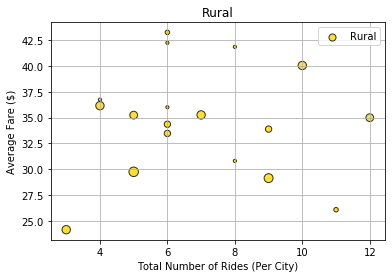

In [27]:
# Build the scatter plots for the rural areas
plt.scatter(rural_ride_count, rural_avg_fare, color="gold", s=10*rural_driver_count, edgecolor="black",
           linewidths=1, alpha=.8, label="Rural")
plt.title('Rural')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()


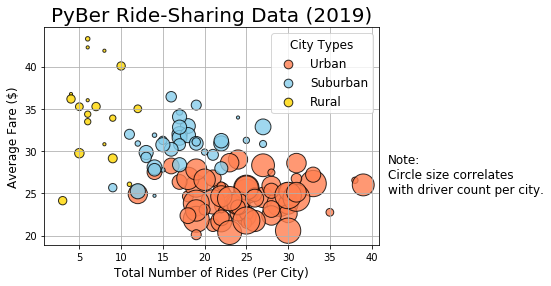

In [28]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count, urban_avg_fare, label="Urban", color= "coral", s=10*urban_driver_count, 
            edgecolor="black", linewidths=1, alpha=.8)
plt.scatter(suburban_ride_count, suburban_avg_fare, color="skyblue",s=10*suburban_driver_count, 
            edgecolor="black", linewidth=1, alpha=.8, label = 'Suburban')
plt.scatter(rural_ride_count, rural_avg_fare, color="gold", s=10*rural_driver_count, edgecolor="black",
           linewidths=1, alpha=.8, label="Rural")

# Otehr graph formates
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.legend()
plt.grid(True)
# Create a Legend - to make all the legend dots the same size
# mode = 'expanded' makes sure the txt fits in the legend
# Loc = 'best' tells it to make the legend fit in the best place available
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 25, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")
# Save the chart
plt.savefig('analysis/Fig1.png')
plt.show()

In [30]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [31]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [32]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [33]:
# Get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [34]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [35]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [36]:
# Calculate the mean of the ride count for each city tyoe
round(urban_ride_count.mean(),2), round (suburban_ride_count.mean(), 2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [37]:
round(urban_ride_count.median(),2), round (suburban_ride_count.median(), 2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [38]:
# Calculate the mode 
round(urban_ride_count.mode(),2), round (suburban_ride_count.mode(), 2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [39]:
# Using Numpy to make teh calculations
import numpy as np
import scipy.stats as sts

In [41]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [45]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")


The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [47]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")


The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [56]:
# Get the fars for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [57]:
# Get the fars for the suburban cities
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [58]:
# Get the fars for the urban cities
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [59]:
# Calulate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for the urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for the urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mmode fare price for the urban trips is ${mode_urban_fares}.")

The mean fare price for the urban trips is $24.53.
The median fare price for the urban trips is $24.64.
The mmode fare price for the urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [60]:
# Calulate the measures of central tendency for the average fare for the urban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for the suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for the suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mmode fare price for the suburban trips is ${mode_suburban_fares}.")

The mean fare price for the suburban trips is $30.97.
The median fare price for the suburban trips is $30.75.
The mmode fare price for the suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [61]:
# Calulate the measures of central tendency for the average fare for the urban cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for the rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for the rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mmode fare price for the rural trips is ${mode_rural_fares}.")

The mean fare price for the rural trips is $34.62.
The median fare price for the rural trips is $37.05.
The mmode fare price for the rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [62]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [63]:
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [75]:
mean_urban_drivers = np.mean(urban_drivers)
print(f'The mean of urban drivers is {mean_urban_drivers}.')

median_urban_drivers = np.median(urban_drivers)
print(f'The median of urban drivers is {median_urban_drivers}.')

mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode of urban drivers is {mode_urban_drivers}.')

The mean of urban drivers is 36.67815384615385.
The median of urban drivers is 37.0.
The mode of urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [76]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(f'The mean of suburban drivers is {mean_suburban_drivers}.')

median_suburban_drivers = np.median(suburban_drivers)
print(f'The median of suburban drivers is {median_suburban_drivers}.')

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'The mode of suburban drivers is {mode_suburban_drivers}.')

The mean of suburban drivers is 13.712.
The median of suburban drivers is 16.0.
The mode of suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [77]:
mean_rural_drivers = np.mean(rural_drivers)
print(f'The mean of rural drivers is {mean_rural_drivers}.')

median_rural_drivers = np.median(rural_drivers)
print(f'The median of rural drivers is {median_rural_drivers}.')

mode_rural_drivers = sts.mode(rural_drivers)
print(f'The mode of rural drivers is {mode_rural_drivers}.')

The mean of rural drivers is 4.296.
The median of rural drivers is 4.0.
The mode of rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


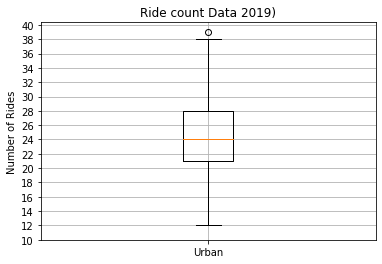

In [86]:
# Create a box and whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride count Data 2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

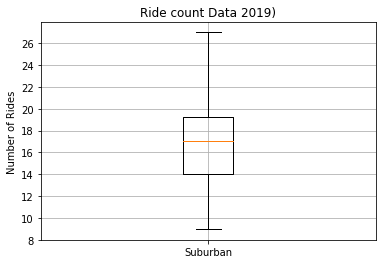

In [87]:
# Create a box and whisker plot for the suburban cities ride count
x_labels_suburban = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels_suburban)
# Add the title, y-axis label and grid.
ax.set_title('Ride count Data 2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8, 28, step=2.0))
ax.grid()
plt.show()

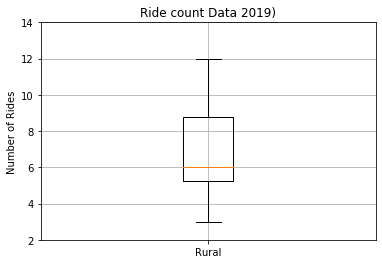

In [88]:
# Create a box and whisker plot for the urban cities ride count
x_labels_rural = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels_rural)
# Add the title, y-axis label and grid.
ax.set_title('Ride count Data 2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2, 15, step=2.0))
ax.grid()
plt.show()

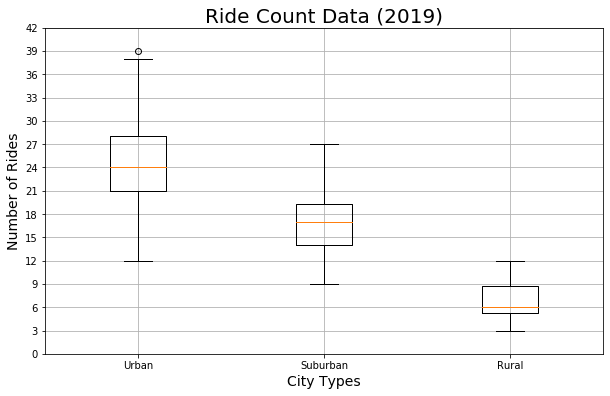

In [89]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [90]:
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [91]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


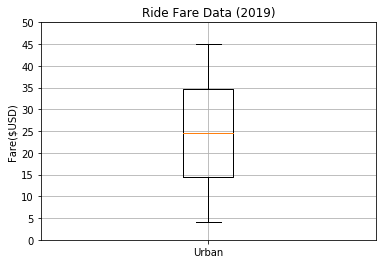

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [92]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

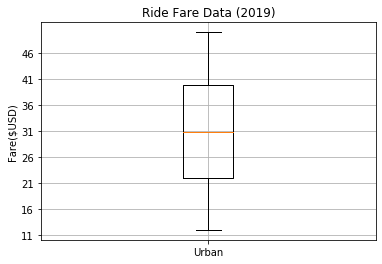

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [94]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(11, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

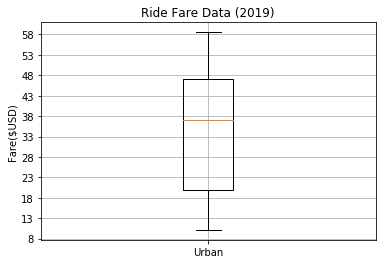

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [96]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(8, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

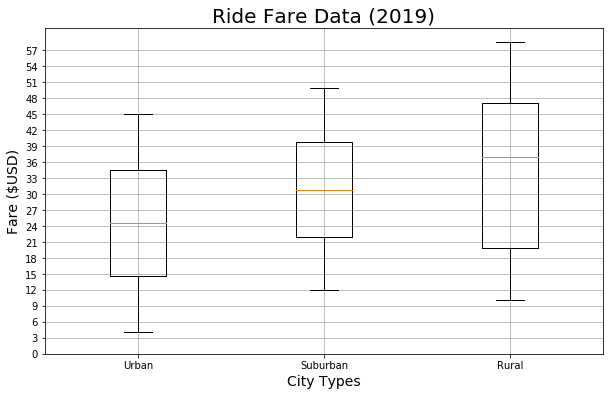

In [106]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fares_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

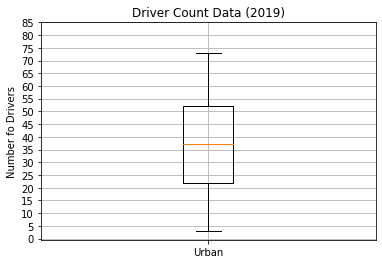

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [101]:
# Create the box-and-whisker plot for the urban driver count data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number fo Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

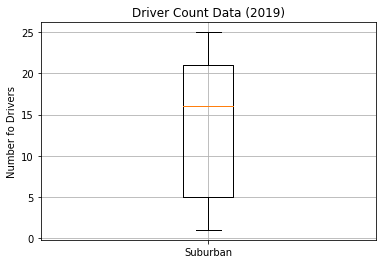

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [103]:
# Create the box-and-whisker plot for the urban driver count data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number fo Drivers')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

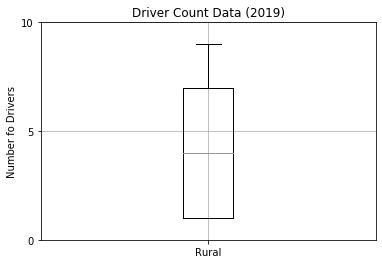

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [105]:
# Create the box-and-whisker plot for the urban driver count data
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number fo Drivers')
ax.set_yticks(np.arange(0, 12, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

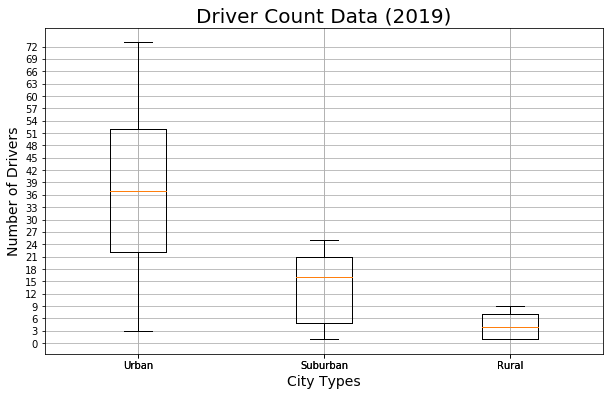

In [110]:
# Combine all the plots
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots(figsize=(10, 6))
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 75, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [114]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [115]:
# Get the sum of all te fares
total_fares = pyber_data_df.sum()["fare"]
total_fares

63538.64000000014

In [116]:
# Calculate the percentage of dare for each city type
type_percentage = sum_fares_by_type / total_fares * 100
type_percentage

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

Text(0.5, 1.0, '% of Total Fares by City Type')

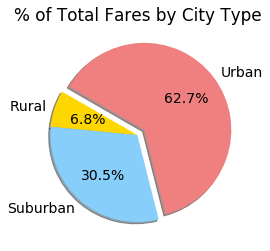

In [131]:
# Create a plot
plt.pie(type_percentage, labels=["Rural", 'Suburban', 'Urban'], 
        colors = ['gold', 'lightskyblue', 'lightcoral'], 
        shadow=True,
       autopct='%1.1f%%',
       startangle=150,
       explode=[0,0,0.1])
plt.title("% of Total Fares by City Type")


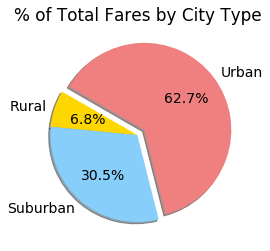

In [134]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Create a plot
plt.pie(type_percentage, labels=["Rural", 'Suburban', 'Urban'], 
        colors = ['gold', 'lightskyblue', 'lightcoral'], 
        shadow=True,
       autopct='%1.1f%%',
       startangle=150,
       explode=[0,0,0.1])
plt.title("% of Total Fares by City Type")
# Cahnge the default font size fro 10 to 14
mpl.rcParams['font.size']=14
# Save the figure